## import

In [122]:
import pandas as pd                # 데이터 분석을 위해 pandas
import numpy as np                 # 수치계산을 위해 numpy
import matplotlib.pyplot as plt    # 시각화를 위해 mapplotlib, seaborn를 불러온다.
import seaborn as sns
# import folium                      # 지도 시각화를 위한 라이브러리
# import json

In [123]:
# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터 가져오기 (data/pet_age_data.csv)

In [124]:
# CSV 파일 읽기
df = pd.read_csv('data/pet_age_data.csv', encoding='cp949')
df.head(2)

,행정구역별(시도),연령대,가구구분,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11
0,행정구역별(시도),연령대,가구구분,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
1,전국,계,계,20926710,17797748,3128962,2970999,2268514,571045,131440,157963,139644,11787,3060,3472


## 데이터 전처리

### 0행의 값을 컬럼으로 넣고 0, 1행 제거

In [125]:
columns = df.iloc[0]

In [126]:
df.columns = columns

In [127]:
df = df.drop([0, 1]).reset_index(drop=True)

In [128]:
df.head(2)

,행정구역별(시도),연령대,가구구분,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
0,전국,20세미만,계,77462,72806,4656,4457,2565,1533,359,199,144,26,29,-
1,전국,20-24세,계,584263,528217,56046,53582,32039,18343,3200,2464,2178,112,99,75


### 불필요한 컬럼 제거

In [129]:
df = df.drop(df.columns[[0, 2, 3, 6, 11, 12, 13, 14]], axis=1)
df.head(2)

,연령대,반려동물미보유가구-계,반려동물보유가구-계,단일-개,단일-고양이,단일-기타,복합-계
0,20세미만,72806,4656,2565,1533,359,199
1,20-24세,528217,56046,32039,18343,3200,2464


### 범례형 타입 데이터 -> 수치형으로 변환

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연령대          13 non-null     object
 1   반려동물미보유가구-계  13 non-null     object
 2   반려동물보유가구-계   13 non-null     object
 3   단일-개         13 non-null     object
 4   단일-고양이       13 non-null     object
 5   단일-기타        13 non-null     object
 6   복합-계         13 non-null     object
dtypes: object(7)
memory usage: 860.0+ bytes


In [131]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce') # errors='coerce' 변환할 수 없는값을 NaN으로

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연령대          13 non-null     object
 1   반려동물미보유가구-계  13 non-null     int64 
 2   반려동물보유가구-계   13 non-null     int64 
 3   단일-개         13 non-null     int64 
 4   단일-고양이       13 non-null     int64 
 5   단일-기타        13 non-null     int64 
 6   복합-계         13 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 860.0+ bytes


### 컬럼이름 재설정

In [133]:
columns = ['연령대', '미보유가구', '보유가구', '개', '고양이', '기타', '복합']
df.columns = columns

In [134]:
df

,연령대,미보유가구,보유가구,개,고양이,기타,복합
0,20세미만,72806,4656,2565,1533,359,199
1,20-24세,528217,56046,32039,18343,3200,2464
2,25-29세,951993,159992,94833,53021,5745,6393
3,30-34세,1137233,196602,120571,60283,7605,8143
4,35-39세,1547463,241237,151121,63828,14949,11339
5,40-44세,1669940,289394,186119,63558,25015,14702
6,45-49세,1886012,414157,285380,82078,25235,21464
7,50-54세,1951910,468757,348617,77848,17102,25190
8,55-59세,1947197,441875,346456,61355,10627,23437
9,60-64세,1876600,352259,284522,41895,7501,18341


### rows 연령대별로 값 합치기

In [135]:
df.iloc[1] = df.iloc[1] + df.iloc[2]
df.iloc[3] = df.iloc[3] + df.iloc[4]
df.iloc[5] = df.iloc[5] + df.iloc[6]
df.iloc[7] = df.iloc[7] + df.iloc[8]
df.iloc[9] = df.iloc[9] + df.iloc[10]
df.iloc[11] = df.iloc[11] + df.iloc[12]
df

,연령대,미보유가구,보유가구,개,고양이,기타,복합
0,20세미만,72806,4656,2565,1533,359,199
1,20-24세25-29세,1480210,216038,126872,71364,8945,8857
2,25-29세,951993,159992,94833,53021,5745,6393
3,30-34세35-39세,2684696,437839,271692,124111,22554,19482
4,35-39세,1547463,241237,151121,63828,14949,11339
5,40-44세45-49세,3555952,703551,471499,145636,50250,36166
6,45-49세,1886012,414157,285380,82078,25235,21464
7,50-54세55-59세,3899107,910632,695073,139203,27729,48627
8,55-59세,1947197,441875,346456,61355,10627,23437
9,60-64세65-69세,3241478,545483,443848,60557,12604,28474


In [136]:
# 불필요한 행 제거
rows_to_remove = [2, 4, 6, 8, 10, 12]
df = df.drop(rows_to_remove)
df = df.reset_index(drop=True)

In [137]:
# '연령대'값 이름 변경
df.loc[0, '연령대'] = '20대미만'
df.loc[1, '연령대'] = '20대'
df.loc[2, '연령대'] = '30대'
df.loc[3, '연령대'] = '40대'
df.loc[4, '연령대'] = '50대'
df.loc[5, '연령대'] = '60대'
df.loc[6, '연령대'] = '70대이상'

In [138]:
df

,연령대,미보유가구,보유가구,개,고양이,기타,복합
0,20대미만,72806,4656,2565,1533,359,199
1,20대,1480210,216038,126872,71364,8945,8857
2,30대,2684696,437839,271692,124111,22554,19482
3,40대,3555952,703551,471499,145636,50250,36166
4,50대,3899107,910632,695073,139203,27729,48627
5,60대,3241478,545483,443848,60557,12604,28474
6,70대이상,2863499,310763,256965,28641,8999,16158


## 시각화

### 반려동물 미보유가구 vs 보유가구 파이차트

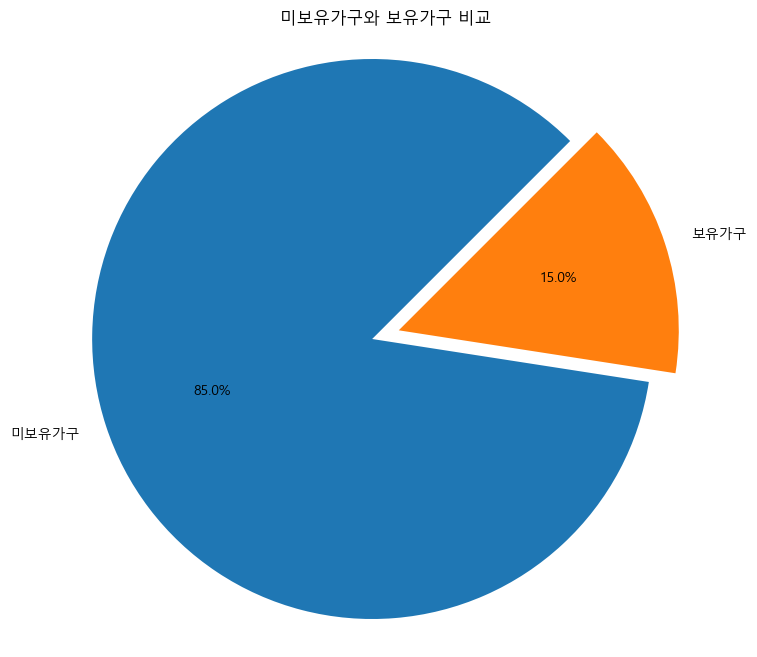

In [139]:
labels = ['미보유가구', '보유가구']
sizes = [df['미보유가구'].sum(), df['보유가구'].sum()]
explodes = (0, 0.1)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        explode=explodes,  # 원에서 조금 벗어나게 함
        labels=labels,     # 라벨
        autopct='%1.1f%%', # 포맷형식
        startangle=45      # 앵글 시작 위치
       )
plt.title('미보유가구와 보유가구 비교')
plt.axis('equal')      # 가로축, 세로축의 스케일을 동일하게 설정
plt.show()

### 연령별 반려종별 파이차트

In [141]:
df['연령대'].tolist()

['20대미만', '20대', '30대', '40대', '50대', '60대', '70대이상']

In [147]:
df.iloc[0]['보유가구']

4656

In [153]:
for i in range(len(df)):
    print(df.iloc[i]['보유가구'])

4656
216038
437839
703551
910632
545483
310763


In [143]:
df

,연령대,미보유가구,보유가구,개,고양이,기타,복합
0,20대미만,72806,4656,2565,1533,359,199
1,20대,1480210,216038,126872,71364,8945,8857
2,30대,2684696,437839,271692,124111,22554,19482
3,40대,3555952,703551,471499,145636,50250,36166
4,50대,3899107,910632,695073,139203,27729,48627
5,60대,3241478,545483,443848,60557,12604,28474
6,70대이상,2863499,310763,256965,28641,8999,16158


In [156]:
df['연령대'].tolist()

['20대미만', '20대', '30대', '40대', '50대', '60대', '70대이상']

In [157]:
a = [ df.iloc[i]['보유가구'] for i in range(len(df)) ]
a

[4656, 216038, 437839, 703551, 910632, 545483, 310763]

In [158]:
df['보유가구'].tolist()

[4656, 216038, 437839, 703551, 910632, 545483, 310763]

In [185]:
# subgroup_names를 연령대와 반려동물 종류의 조합으로 새로 생성
subgroup_names_combined = []
for age_group in group_names:
    for pet_type in ['개', '고양이', '기타', '복합']:
        subgroup_names_combined.append(f'{age_group} {pet_type}')
# subgroup_names_combined

In [194]:
subgroup_sizes = []
for age_group in group_names:
    # 각 연령대에 해당하는 행을 가져와서 '개', '고양이', '기타', '복합' 열의 값을 합산하여 리스트에 추가
    subgroup_data = df[df['연령대'] == age_group][['개', '고양이', '기타', '복합']].sum().tolist()
    subgroup_sizes.extend(subgroup_data)
subgroup_sizes

[2565,
 1533,
 359,
 199,
 126872,
 71364,
 8945,
 8857,
 271692,
 124111,
 22554,
 19482,
 471499,
 145636,
 50250,
 36166,
 695073,
 139203,
 27729,
 48627,
 443848,
 60557,
 12604,
 28474,
 256965,
 28641,
 8999,
 16158]

In [195]:
df

,연령대,미보유가구,보유가구,개,고양이,기타,복합
0,20대미만,72806,4656,2565,1533,359,199
1,20대,1480210,216038,126872,71364,8945,8857
2,30대,2684696,437839,271692,124111,22554,19482
3,40대,3555952,703551,471499,145636,50250,36166
4,50대,3899107,910632,695073,139203,27729,48627
5,60대,3241478,545483,443848,60557,12604,28474
6,70대이상,2863499,310763,256965,28641,8999,16158


***

최종

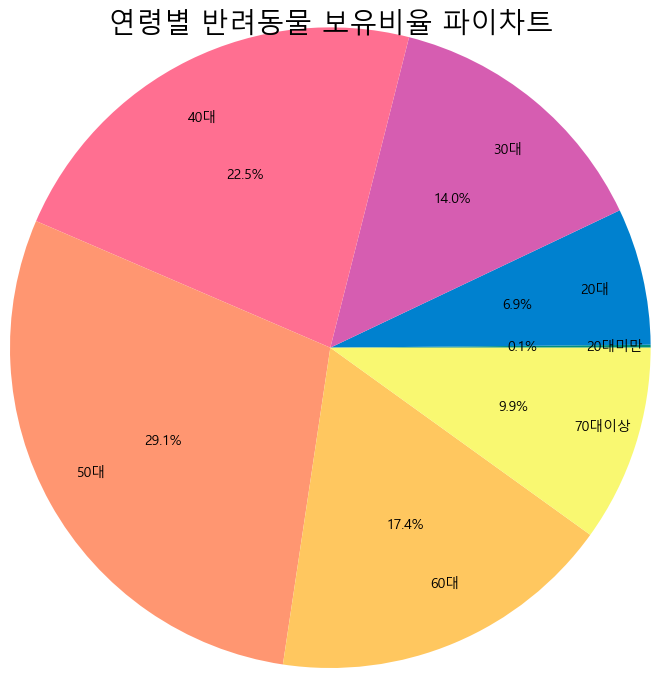

In [218]:
plt.figure(figsize=(8, 8))               # 차트 크기
# 파이 그리기 위한 데이터 --------------------------------------

# 밖의 원 데이터 연령대 - 보유가구
group_names = df['연령대'].tolist()      # out pie차트 이름
group_sizes = df['보유가구'].tolist()     # out pie차트 데이터

# colors
main_colors = ['#008F7A', '#0081CF', '#D65DB1',
          '#FF6F91', '#FF9671', '#FFC75F', '#F9F871']

# 파이차트 그리기 ----------------------------------------------
plt.pie(group_sizes,         # 밖의 원 데이터
                        radius=1.3,          # 파이차트 반지름
                        labels=group_names,  # 라벨 이름
                        labeldistance=0.8,   # 라벨 위치
                        autopct='%1.1f%%',   # 수치값
                        colors=main_colors)  # 색상

plt.title('연령별 반려동물 보유비율 파이차트', fontsize=20)
plt.show()

<Figure size 1500x1500 with 0 Axes>

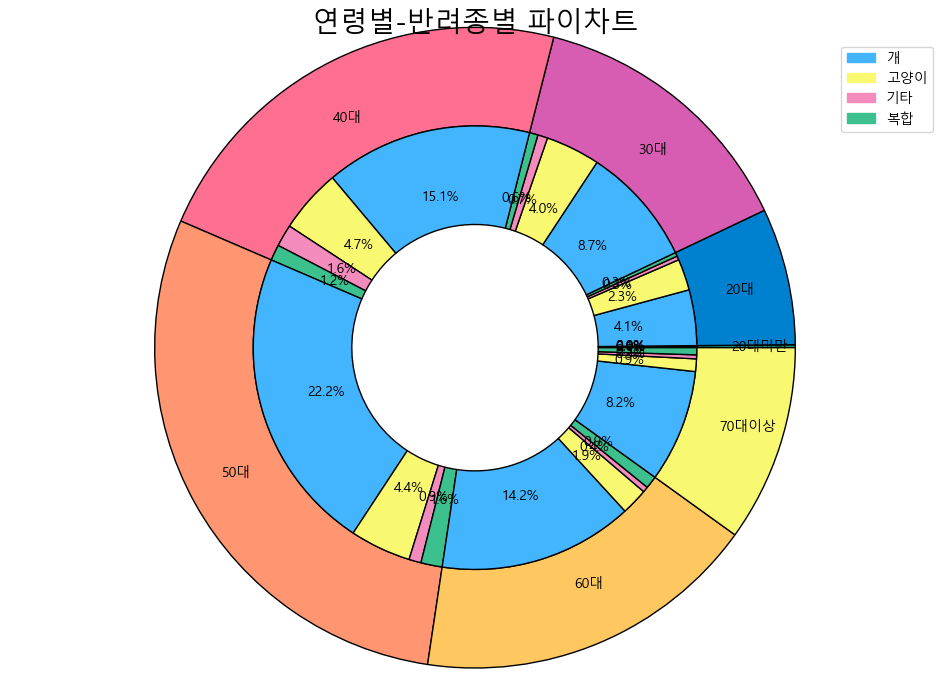

In [220]:
import matplotlib.patches as mpatches  # Patch 객체를 위해 추가 (범례 수동생성 때문에)

plt.figure(figsize=(15, 15))               # 차트 크기
# 파이 그리기 위한 데이터 --------------------------------------

# 밖의 원 데이터 연령대 - 보유가구
group_names = df['연령대'].tolist()      # out pie차트 이름
group_sizes = df['보유가구'].tolist()     # out pie차트 데이터

#안의 원 데이터 연령대별 - 반려종 - 보유가구
subgroup_names = []
for age_group in group_names:
    for pet_type in ['개', '고양이', '기타', '복합']:
        subgroup_names.append(f'{age_group} {pet_type}')
# 각 연령대별로 '개', '고양이', '기타', '복합' 등의 보유가구 수를 합산하여 subgroup_sizes 리스트 생성
subgroup_sizes = []
for age_group in group_names:
    # 각 연령대에 해당하는 행을 가져와서 '개', '고양이', '기타', '복합' 열의 값을 합산하여 리스트에 추가
    subgroup_data = df[df['연령대'] == age_group][['개', '고양이', '기타', '복합']].sum().tolist()
    subgroup_sizes.extend(subgroup_data)


# TEST) 이제 subgroup_sizes의 길이는 연령대 수 * 반려동물 종류 수와 일치해야 함
# assert len(subgroup_sizes) == len(subgroup_names) * len(subgroup_sizes), "subgroup_sizes의 길이가 예상과 다름"

# colors
main_colors = ['#008F7A', '#0081CF', '#D65DB1',
          '#FF6F91', '#FF9671', '#FFC75F', '#F9F871']
sub_colors = ['#43B5FF', '#F9F871', '#F48BBD', '#3BC08E']

# width (plt.setp()의 파이조각 넓이)
width_num = 0.4

# 파이차트 그리기 ----------------------------------------------

# 밖의 원
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes,         # 밖의 원 데이터
                        radius=1.3,          # 파이차트 반지름
                        labels=group_names,  # 라벨 이름
                        labeldistance=0.8,   # 라벨 위치
                        colors=main_colors)  # 색상
# 밖의원 위치 설정
plt.setp(pie_outside, 
         width=width_num,   # 파이조각 넓이
         edgecolor='black') # edge 색상

# 안의 원
pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes,              # 안의 원 데이터
           radius=(1.3 - width_num),   # 주 반지름 - 0.4
#            labels=subgroup_names,      # 라벨 이름
#            labeldistance=0.8,         # 라벨 위치
           autopct='%1.1f%%',          # 수치값
           pctdistance=0.7,           # 수치값의 위치
           colors=sub_colors)          # 색상
# 안의원 위치 설정
plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='black')

# 범례 항목을 직접 생성
legend_labels = ['개', '고양이', '기타', '복합']
legend_handles = [mpatches.Patch(color=sub_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# 범례 추가
plt.legend(handles=legend_handles, loc='upper right')

plt.title('연령별-반려종별 파이차트', fontsize=20)
plt.show()

파이차트 안의 파이차트 예제

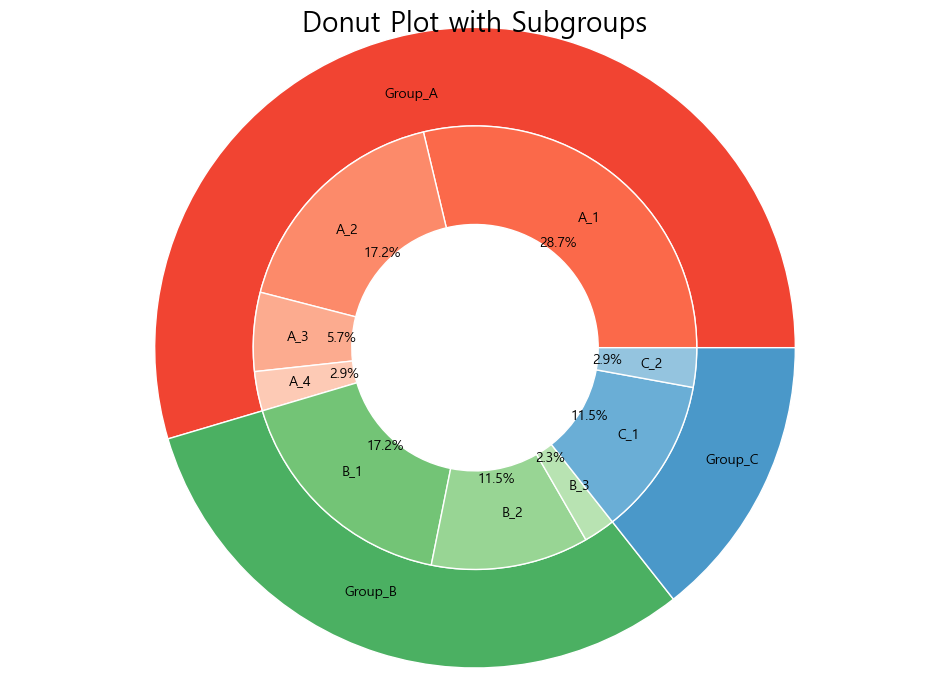

In [103]:
plt.rcParams['figure.figsize'] = [12, 8]
    # info. of groups
group_names = ['Group_A', 'Group_B', 'Group_C']
group_sizes = [95, 54, 25]

# info. of subgroups
subgroup_names = ['A_1', 'A_2', 'A_3', 'A_4', 
                  'B_1', 'B_2', 'B_3', 
                  'C_1', 'C_2']

subgroup_sizes = [50, 30, 10, 5, 30, 20, 4, 20, 5]

# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

# width
width_num = 0.4

# Outside Ring

fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring
pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.75, 
           autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), a(0.3), a(0.2), 
                   b(0.5), b(0.4), b(0.3), 
                   c(0.5), c(0.4)])

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.title('Donut Plot with Subgroups', fontsize=20)
plt.show()